# Problem Set 5

See [Introduction](https://datascience.quantecon.org/../pandas/intro.html) and [Basic Functionality](https://datascience.quantecon.org/../pandas/basics.html)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Setup for Question 1-5

These questions use data on daily Covid cases in health regions in Canada from the [COVID-19 Canada Open Data Working Group](https://github.com/ccodwg/Covid19Canada).

We will be begin by loading this data and putting it into a similar format as the `unemp` data from the [Basic Functionality](https://datascience.quantecon.org/../pandas/basics.html) lecture.

In [2]:
url = "https://github.com/ccodwg/Covid19Canada/raw/master/timeseries_hr/cases_timeseries_hr.csv"
try : # only download if cases_raw has not already been defined 
    cases_raw
except:
    cases_raw = pd.read_csv(url, parse_dates=["date_report"])

try :
    hr_map 
except: 
    hr_map = pd.read_csv("https://github.com/ccodwg/Covid19Canada/raw/master/other/hr_map.csv")

Now, we create cases per 100,000 and then do the same manipulation as in the pandas basics lecture. We will focus on BC health regions in this problem set.

In [3]:
cases_bc = cases_raw.loc[(cases_raw['province']=='BC') &  
                         (cases_raw['date_report']<=pd.to_datetime('2021-10-18')),:] # so results don't change as data gets updated
# create cases per 100,000
cases_bc = cases_bc.merge(hr_map[['province','health_region','pop']],
                          on=['province','health_region'],
                          how='left')
cases_bc['cases100k'] = cases_bc['cases']/cases_bc['pop']*100_000
cases_bc = ( 
    cases_bc.reset_index()
    .pivot_table(index='date_report',columns='health_region', values='cases100k')
)    
cases_bc

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-04,0.998641,0.869332,0.590996,0.335494,1.722108
2020-01-05,0.840961,0.496761,0.118199,1.006482,0.656041
2020-01-06,1.156321,0.000000,0.000000,0.000000,0.164010
...,...,...,...,...,...
2021-10-14,12.929770,12.915789,5.673558,43.278715,4.346272
2021-10-15,12.929770,12.543218,6.973748,61.730880,6.150384
2021-10-16,0.000000,0.000000,0.000000,0.000000,0.000000


The resulting `cases_bc` DataFrame contains Covid cases per 100,000 population for each BC health region and day.

## Question 1

At each date, what is the minimum number of cases per 100,000 across health regions?

In [4]:
cases_bc.agg(min, axis=1)

date_report
2020-01-02     0.000000
2020-01-03     0.000000
2020-01-04     0.335494
2020-01-05     0.118199
2020-01-06     0.000000
                ...    
2021-10-14     4.346272
2021-10-15     6.150384
2021-10-16     0.000000
2021-10-17     0.000000
2021-10-18    17.385086
Length: 613, dtype: float64

What was the (daily) median number of cases per 100,000 in each health region?

In [5]:
cases_bc.median()

health_region
Fraser               1.208881
Interior             0.248381
Island               0.118199
Northern             0.335494
Vancouver Coastal    0.984061
dtype: float64

What was the maximum number of cases per 100,000 across health regions? In what health region did it happen? On what date was this achieved?

- Hint 1: What Python type (not `dtype`) is returned by a reduction?  
- Hint 2: Read documentation for the method `idxmax`.  

In [6]:
def idxmax(x):
    # idxmax of Series will return index of maximal value
    return x.idxmax()
cases_bc.agg([max,idxmax],axis=1,)

,max,idxmax
date_report,,
2020-01-02,0.0,Fraser
2020-01-03,0.0,Fraser
2020-01-04,1.722108,Vancouver Coastal
2020-01-05,1.006482,Northern
2020-01-06,1.156321,Fraser
...,...,...
2021-10-14,43.278715,Northern
2021-10-15,61.73088,Northern
2021-10-16,0.0,Fraser


Classify each health region as high or low volatility based on whether the variance of their cases per 100,000 is above or below 100.

In [7]:
def high_or_low(s):
    """
    This function takes a pandas Series object and returns high
    if the mean is above 6.5 and low if the mean is below 6.5
    """
    if s.var() < 100:
        out = "Low"
    else:
        out = "High"

    return out
cases_bc.agg(high_or_low)

health_region
Fraser               High
Interior             High
Island                Low
Northern             High
Vancouver Coastal     Low
dtype: object

## Question 2

Imagine that we want to determine whether cases per 100,000 was high (> 10),
medium (1 < x <= 10), or low (<= 1) for each health region and each day.

Write a Python function that takes a single number as an input and
outputs a single string which notes whether that number is high, medium, or low.

In [8]:
def high_medium_low(s):
    if s > 10:
        out = "High"
    elif s <= 1:
        out = "Low"
    else:
        out = "Medium"

    return out

print("test:")
print(high_medium_low(1))
print(high_medium_low(2))
print(high_medium_low(20))

test:
Low
Medium
High


Pass your function to either `apply` or `applymap` and save the result in a new DataFrame called `case_bins`.

In [9]:
case_bins = cases_bc.applymap(high_medium_low)
case_bins

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
date_report,,,,,
2020-01-02,Low,Low,Low,Low,Low
2020-01-03,Low,Low,Low,Low,Low
2020-01-04,Low,Low,Low,Low,Medium
2020-01-05,Low,Low,Low,Medium,Low
2020-01-06,Medium,Low,Low,Low,Low
...,...,...,...,...,...
2021-10-14,High,High,Medium,High,Medium
2021-10-15,High,High,Medium,High,Medium
2021-10-16,Low,Low,Low,Low,Low


## Question 3

This exercise has multiple parts:

Use another transformation on `case_bins` to count how many times each health region had each of the three classifications.

- Hint 1: Will you need to use `apply` or `applymap` for transformation?  
- Hint 2: Try googling “pandas count unique value” or something similar to find the proper transformation.  

In [10]:
def valuec(x):
    return x.value_counts()
case_bins.agg(valuec)

health_region,Fraser,Interior,Island,Northern,Vancouver Coastal
High,177,104,24,135,124
Low,289,364,435,356,310
Medium,147,145,154,122,179


Construct a horizontal bar chart (you can refer to an example of horizontal bar chart [here](https://www150.statcan.gc.ca/edu/power-pouvoir/c-g/c-g05-2-3-eng.png)) to detail the occurrences of each level.
Use one bar per health region and classification for 15 total bars.

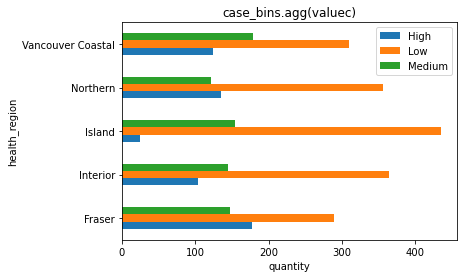

In [11]:
import matplotlib.pyplot as plt

df = case_bins.agg(valuec)
dft = df.T

dft.plot.barh()

plt.title('case_bins.agg(valuec)')
plt.ylabel('health_region')
plt.xlabel('quantity')
plt.show()

## Question 4

Repeat Question 3, but count how many health regions had each classification on each day. Which day had the most health regions with high cases per 100,000? What about medium and low?

Part 1: Write a Python function to classify cases per 100,000 levels (this might be the same as the function you wrote in Question 2).

In [12]:
def hml(s):
    if s > 10:
        out = "High"
    elif s <= 1:
        out = "Low"
    else:
        out = "Medium"

    return out


Part 2: Decide whether you should use `.apply` or `.applymap` and pass your function from Part 1 to the appropriate method.

In [13]:
def number_of_health_regions(hml):
    
    case_bins = cases_bc.applymap(hml)
    nhr = case_bins.agg(valuec,axis=1)
    return nhr

dfnhr=number_of_health_regions(hml)
dfnhr

,High,Low,Medium
date_report,,,
2020-01-02,NaN,5.0,NaN
2020-01-03,NaN,5.0,NaN
2020-01-04,NaN,4.0,1.0
2020-01-05,NaN,4.0,1.0
2020-01-06,NaN,4.0,1.0
...,...,...,...
2021-10-14,3.0,NaN,2.0
2021-10-15,3.0,NaN,2.0
2021-10-16,NaN,5.0,NaN


Part 3: Plot the number of low, medium, and high regions on each date. Your plot(s) should have date on the horizontal axis and number of regions on the vertical axis. You can choose whether to make one plot with three lines (or bars etc) or to make three plots.

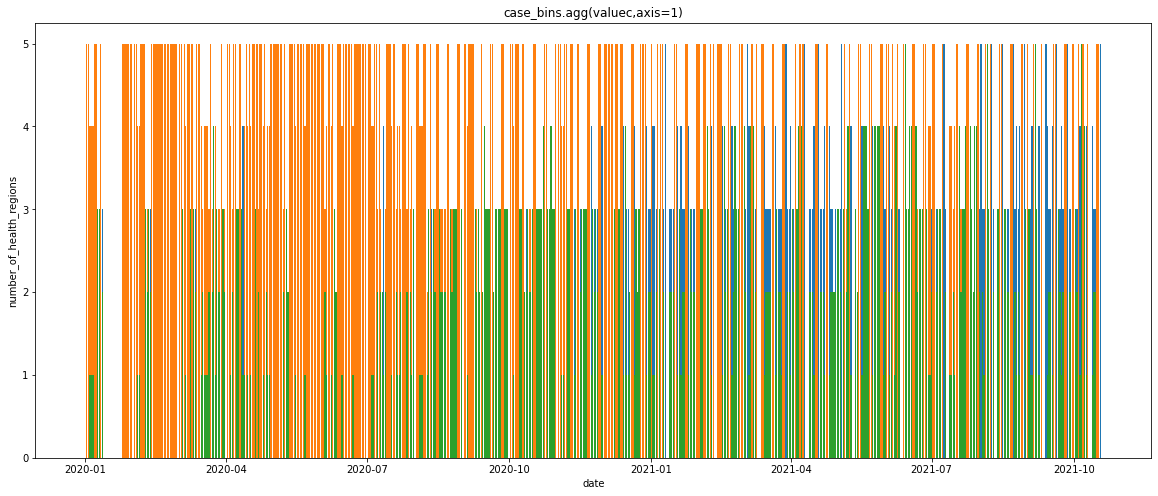

In [14]:
index = dfnhr.index
valueh = dfnhr['High']
valuel = dfnhr['Low']
valuem = dfnhr['Medium']

ax,fig = plt.subplots(figsize=(20,8))
plt.bar(index,valueh,label = 'high')
plt.bar(index,valuel, label ='low')
plt.bar(index,valuem,label = 'medium')
plt.title('case_bins.agg(valuec,axis=1)')
plt.ylabel('number_of_health_regions')
plt.xlabel('date')
plt.show()

## Question 5

For a single health region of your choice, determine the mean
cases per 100,000 during “Low”, “Medium”, and “High” case times.
(recall your `case_bins` DataFrame from the exercise above)

In [15]:
cases_bc_fraser_high = cases_bc.loc[cases_bc["Fraser"] >10]
print(f"mean of fraser high {cases_bc_fraser_high['Fraser'].mean()}")

cases_bc_fraser_low = cases_bc.loc[cases_bc["Fraser"] <= 1]
print(f"mean of fraser low {cases_bc_fraser_low['Fraser'].mean()}")

cases_bc_fraser_medium = cases_bc.loc[(cases_bc["Fraser"] >1) & (cases_bc["Fraser"] <= 10)]
print(f"mean of fraser medium {cases_bc_fraser_medium['Fraser'].mean()}")

mean of fraser high 25.322656149812055
mean of fraser low 0.149859773627282
mean of fraser medium 3.496136668866537


Which health regions in our sample performs the best during “bad times?” To
determine this, compute each health region’s mean cases per 100,000 where the daily cases per 100,000 is greater than 10 (i.e., in the "high"
category).

In [16]:
cases_bc_high = cases_bc[cases_bc >10]
print(f"mean of high {cases_bc_high.mean()}")
print("Island is performing the best during 'bad times'.")

mean of high health_region
Fraser               25.322656
Interior             25.988010
Island               16.050455
Northern             28.715794
Vancouver Coastal    19.299641
dtype: float64
Island is performing the best during 'bad times'.
